In [1]:
import torch
from PIL import Image
import numpy as np
from torch.distributions import Categorical
import matplotlib.pyplot as plt

# %matplotlib inline
r = Image.open('images.png')
a = np.array(r)

# r = Image.open((plt.imread('images.png')).astype(np.float32))
# print(r)
img = (plt.imread('images.png')).astype(np.float32)
# print(list(img))
# line = img > 180
# plt.imshow(line.astype(np.float32))
# print(line.sum())
# plt.grid('off')
# prob = torch.FloatTensor(np.array(r).flatten()/np.array(r).sum())
# prob = prob.unsqueeze(0).repeat(10,1)
# m = Categorical(prob)
# a = m.sample_n(2).float()
# print(a)
# with open('siggraph.pkl', 'rb') as f:
#     X = np.array(pickle.load(f))
# X -= np.mean(X, axis=0)  # center
# xlim, ylim = [-4, 4], [-2, 2]
#


[[114 244]
 [115 244]
 [116 244]
 ...
 [204  45]
 [205  45]
 [206  45]]


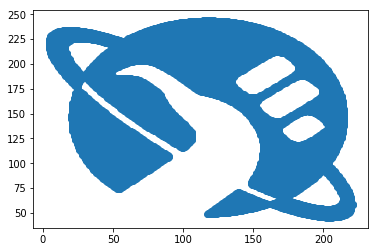

In [32]:
# from random import rand
image = 1 - plt.imread('images.png')
img = (image).astype(np.float32)
img = img[:,:,0]
# img = img > 0
# img = img.astype(np.float32)
# plt.imshow(img)
x = []
y = []
point = []
for i in range(225):
    for j in range(225):
        if img[i, j] > 0.5:
            point.append([j, 255-i])
            x.append(j)
            y.append(255 - i)
plt.scatter(x, y)
# 1/450
a = np.array(point)
print(a)
# import pickle
# with open('datapoint.pkl', 'wb') as handle:
#     pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
import random
from math import *
def gaussian_mixture(batchsize, ndim = 10, num_labels= 10):
    if ndim % 2 != 0:
        raise Exception("ndim must be a multiple of 2.")

    def sample(x, y, label, num_labels):
        shift = 1.4
        r = 2.0 * np.pi / float(num_labels) * float(label)
        new_x = x * cos(r) - y * sin(r)
        new_y = x * sin(r) + y * cos(r)
        new_x += shift * cos(r)
        new_y += shift * sin(r)
        return np.array([new_x, new_y]).reshape((2,))

    x_var = 0.5
    y_var = 0.05
    x = np.random.normal(0, x_var, (batchsize, ndim // 2))
    y = np.random.normal(0, y_var, (batchsize, ndim // 2))
    z = np.empty((batchsize, ndim), dtype=np.float32)
    for batch in range(batchsize):
        for zi in range(ndim // 2):
            z[batch, zi*2:zi*2+2] = sample(x[batch, zi], y[batch, zi], random.randint(0, num_labels - 1), num_labels)
    return z

sample = gaussian_mixture(2048)

In [11]:
import pickle
import numpy as np
def preprocess(data):
    noise = np.random.rand(data.shape[0], data.shape[1]) - 0.5
    noisy_data = data + noise
    r_data = noisy_data / data.max()
    return r_data

def sample(n):
    with open('datapoint.pkl', 'rb') as handle:
        data = pickle.load(handle)
    r_data = preprocess(data)
    np.random.shuffle(r_data)
    return r_data[:n]
sample=sample(30000)
sample

array([[0.3011201 , 0.62705077],
       [0.59484749, 0.66317047],
       [0.29489991, 0.63879233],
       ...,
       [0.42560967, 0.5408714 ],
       [0.47158349, 0.95213684],
       [0.35034117, 0.95983949]])

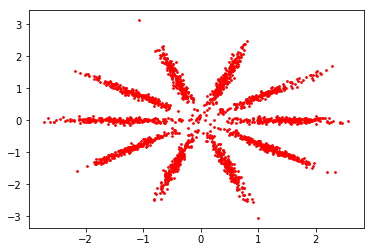

In [24]:
import matplotlib.pyplot as plt
# img -= np.mean(img, axis=0)  # center
# xlim, ylim = [0, 255], [0, 255]
plt.scatter(sample[:,2],sample[:,3], s=3, color='red')
# plt.xlim(xlim)
# plt.ylim(ylim)